In [1]:
import os
import fileinput
import csv

import numpy as np

import datetime

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import matplotlib.cm as cm
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
class cdat:
    def __init__(self):
        self.name = ''
        self.idx = []
        self.dte = []
        self.con = []
        self.rec = []
        self.ded = []
        self.gf = []
    def gfactor(self):
        if len(self.gf) == 0:
            self.gf = np.zeros_like(self.idx, dtype=float)
            for i in range(1,len(self.idx)):
                if(self.con[i-1] > 0):
                    self.gf[i] = float(self.con[i])/float(self.con[i-1])
        return self.gf

def readdata_wrd(path, dest):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                print(f'Column names are {", ".join(row)}')
                line_count += 1
            else:
    #             print(row)
                dest.idx.append(line_count-1)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[1]))
                dest.ded.append(int(row[3]))
#                 print(dest.idx[-1])
        print(f'Processed {line_count} lines.')
    dest.name = 'World'
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

def readdata_cnt(path, dest, cntname):
    with open(path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
    #             print(f'Column names are {", ".join(row)}')
                line_count += 1
            elif row[1] == cntname:
    #             print(row)
                dest.idx.append(line_count-1)
                line_count += 1
                r = row[0].split('-')
                d = datetime.date(year=int(r[0]), month=int(r[1]),day=int(r[2]))
                dest.dte.append(d)
                dest.con.append(int(row[2]))
                dest.ded.append(int(row[4]))
#                 print(dest.idx[-1])
#                 print(d, row[2])
            else:
                pass
        print(f'Processed {line_count} lines.')
    dest.name=cntname
    dest.idx=np.array(dest.idx)
    dest.dte=np.array(dest.dte)
    dest.con=np.array(dest.con)
    dest.ded=np.array(dest.ded)

In [4]:
clist = []

clist.append(cdat())
readdata_wrd('../data/worldwide-aggregate.csv', clist[-1])

for c in ['Poland', 'Italy', 'US', 'Germany', 'Spain', 'France', 'Japan', 'Czechia']:
    clist.append(cdat())
    readdata_cnt('../data/countries-aggregated.csv', clist[-1], c)
print('From: ', clist[0].dte[0], 'To', clist[0].dte[-1])

Column names are Date, Confirmed, Recovered, Deaths, Increase rate
Processed 254 lines.
Processed 254 lines.
Processed 254 lines.
Processed 254 lines.
Processed 254 lines.
Processed 254 lines.
Processed 254 lines.
Processed 254 lines.
Processed 254 lines.
From:  2020-01-22 To 2020-09-30


In [5]:
for c in clist:
    print("{0:>7}".format(c.name), len(c.idx))

  World 253
 Poland 253
  Italy 253
     US 253
Germany 253
  Spain 253
 France 253
  Japan 253
Czechia 253


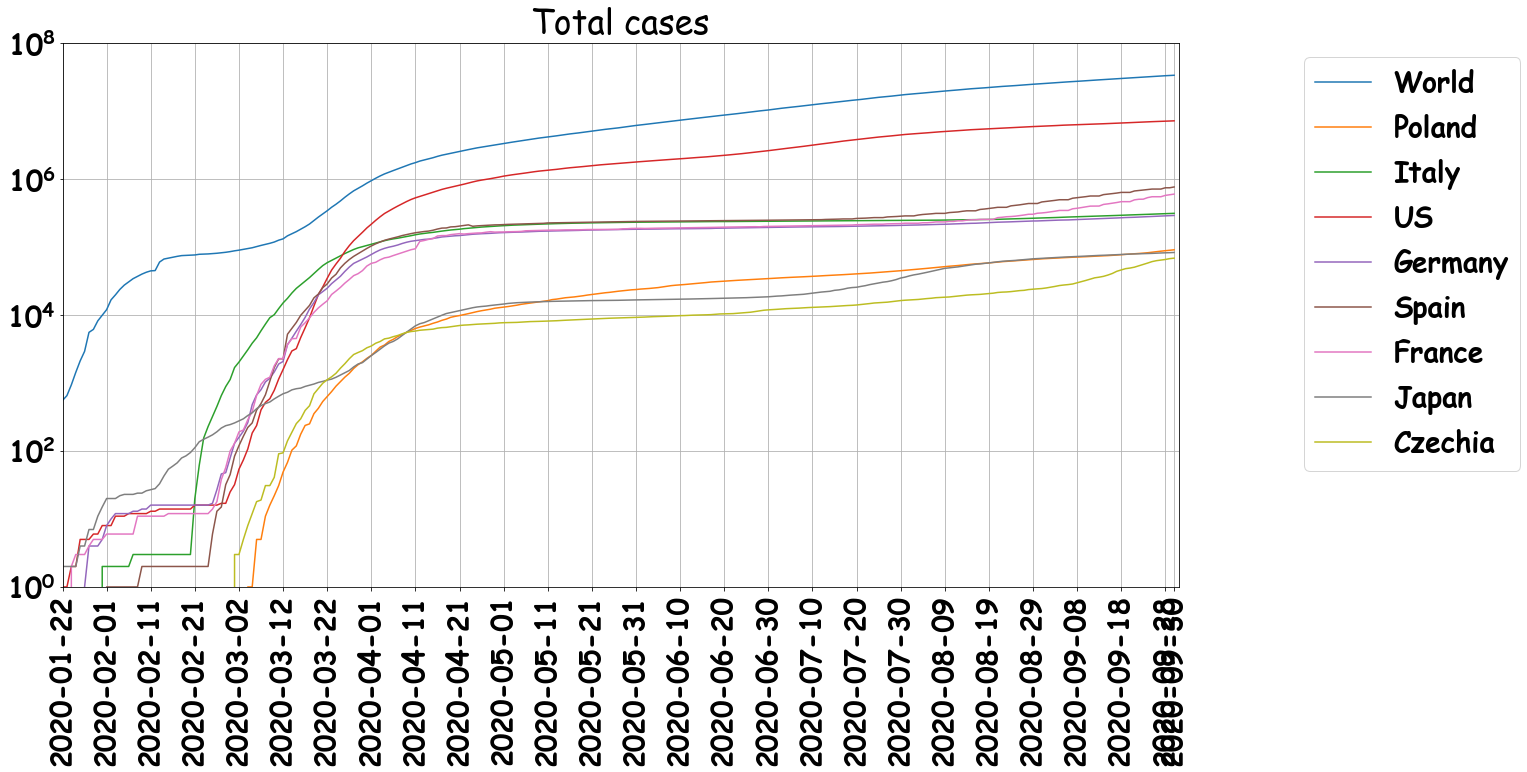

In [11]:
%matplotlib inline
font = {'family' : 'Comic Sans MS',
        'weight' : 'bold',
        'size'   : 28}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.con, label=c.name)
    
plt.title('Total cases')
plt.yscale('log')
plt.ylim(1,1e8)
plt.xlim(0, clist[0].idx[-1]+1)
plt.legend(bbox_to_anchor=(1.1, 1., 0, 0))

base = 10
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]:
    if clist[0].idx[-1]-1 == lo[-1]:
        lo[-1] = clist[0].idx[-1]
    else:
        lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

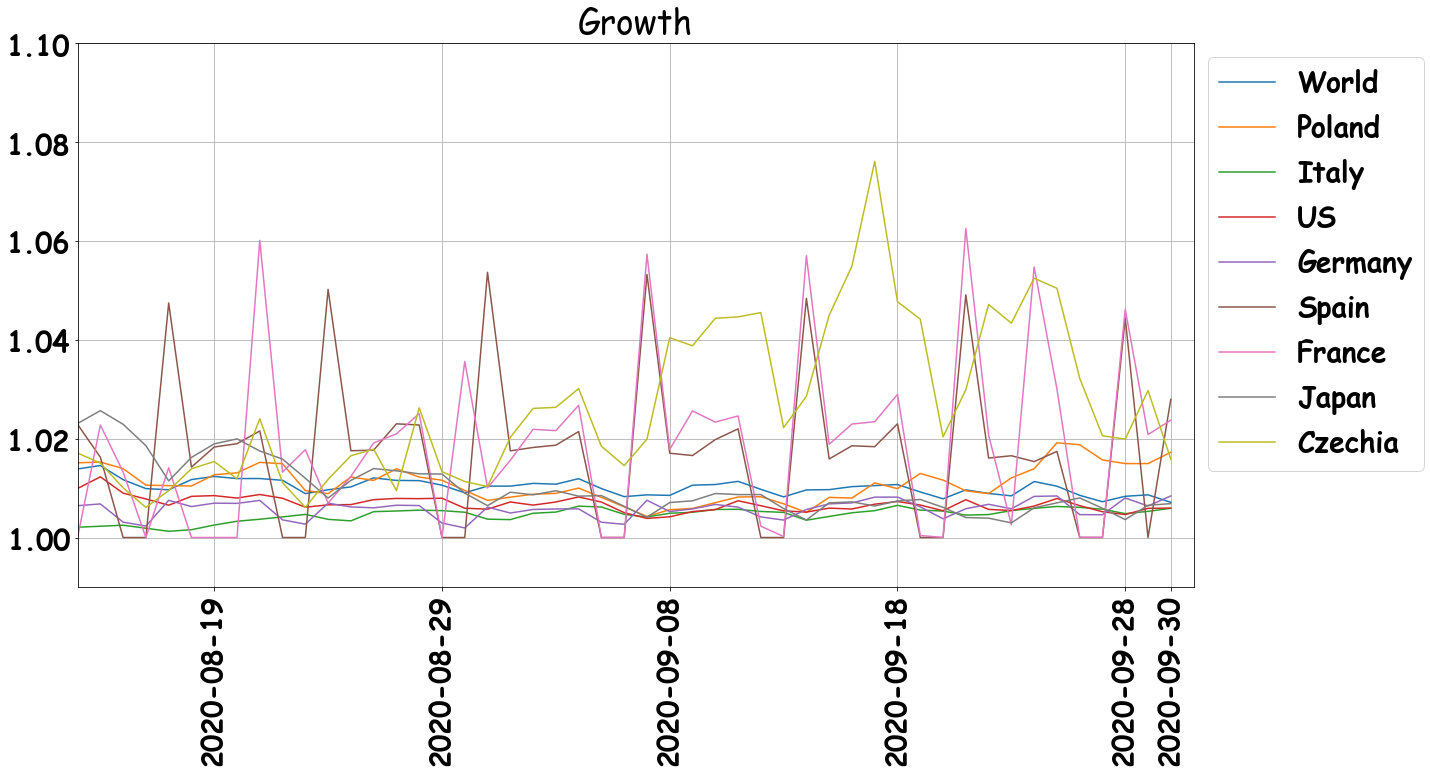

In [32]:
fig, ax = plt.subplots(figsize=(20,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(clist[0].idx[-50]+1, clist[0].idx[-1]+1)
#plt.yscale('log')
plt.ylim(0.99,1.1)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))

base = 10
lo = list(clist[0].idx[::base])
if lo[-1] != clist[0].idx[-1]:
    if clist[0].idx[-1]-1 == lo[-1]:
        lo[-1] = clist[0].idx[-1]
    else:
        lo.append(clist[0].idx[-1])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

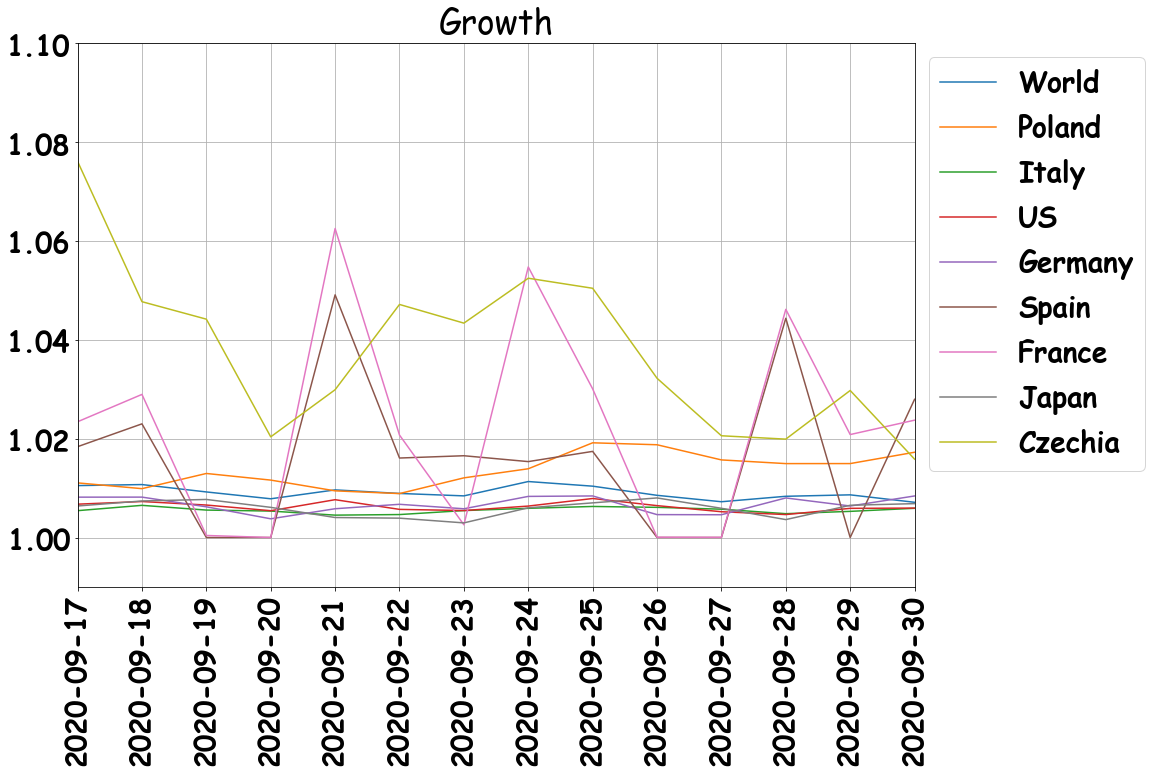

In [31]:
fig, ax = plt.subplots(figsize=(15,10))

for c in clist:
    ax.plot(c.idx, c.gfactor(), label=c.name)

plt.title('Growth')
plt.xlim(clist[0].idx[-14], clist[0].idx[-1])
plt.ylim(0.99,1.1)
plt.legend(bbox_to_anchor=(1, 1., 0, 0))

base = 1
lo = list(clist[0].idx[::base])
loc = plticker.FixedLocator(locs=lo) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(locator=loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
ax.set_xticklabels([clist[0].dte[i] for i in loc()], rotation=90)
plt.grid()

#### Growth averaged from first detected case

In [36]:
for d in clist:
    av = np.mean([x for x in d.gf if x])
    print("{0:>7}".format(d.name), round(av,4))

  World 1.0478
 Poland 1.0723
  Italy 1.075
     US 1.0742
Germany 1.065
  Spain 1.0715
 France 1.0594
  Japan 1.0466
Czechia 1.0547


#### Growth averaged for last 14 days

In [37]:
for d in clist:
    av = np.mean([x for x in d.gf[-14:] if x])
    print("{0:>7}".format(d.name), round(av,3))

  World 1.009
 Poland 1.014
  Italy 1.006
     US 1.006
Germany 1.007
  Spain 1.016
 France 1.022
  Japan 1.006
Czechia 1.038


#### Growth last day:

In [22]:
for d in clist:
    print("{0:>7}".format(d.name), d.dte[-1], "{0:>8}".format(d.con[-1]), "{0:>6}".format(d.con[-1]-d.con[-2]), round(d.gf[-1],3))

  World 2020-09-30 33881272 239719 1.007
 Poland 2020-09-30    91514   1552 1.017
  Italy 2020-09-30   314861   1850 1.006
     US 2020-09-30  7233042  42812 1.006
Germany 2020-09-30   292913   2442 1.008
  Spain 2020-09-30   769188  20922 1.028
 France 2020-09-30   604031  14010 1.024
  Japan 2020-09-30    83591    569 1.007
Czechia 2020-09-30    68919   1076 1.016


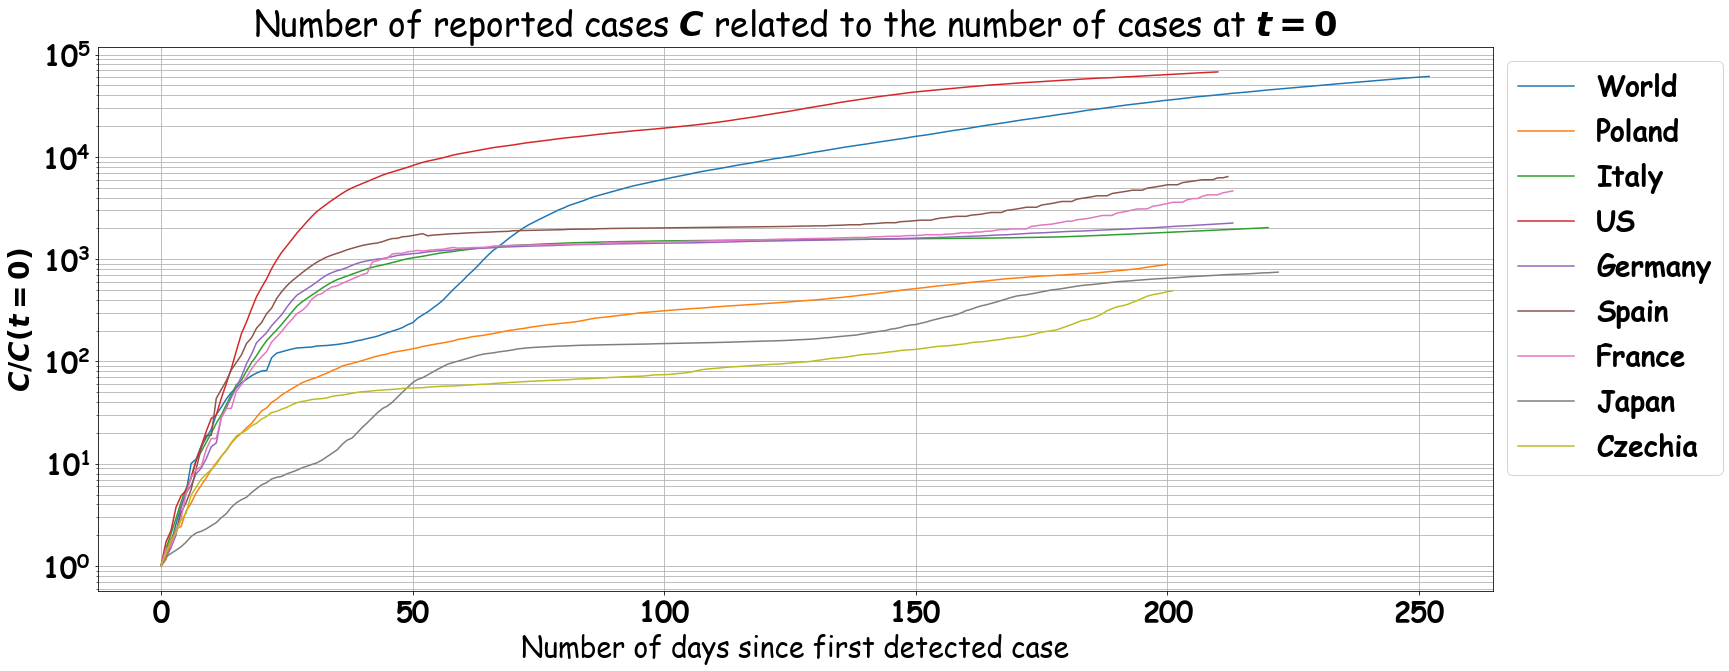

In [23]:
fig, ax = plt.subplots(figsize=(25,10))

for c in clist:
    con = np.array([x for x in c.con if x > 100])
    con = con/con[0]
    idx = range(0,len(con))
    plt.plot(idx, con, label=c.name)

plt.title('Number of reported cases $C$ related to the number of cases at $t=0$')
plt.xlabel('Number of days since first detected case')
plt.ylabel('$C/C(t=0)$')
plt.yscale('log')
plt.legend(bbox_to_anchor=(1, 1., 0, 0))
plt.grid(which='both')

## Time it takes to multiply by 10

In [38]:
c = clist[1]
idx1 = next(i for i,x in enumerate(c.con) if x > 10)
idx2 = next(i for i,x in enumerate(c.con) if x > 100)
print(idx2-idx1)
idx1 = next(i for i,x in enumerate(c.con) if x > 100)
idx2 = next(i for i,x in enumerate(c.con) if x > 1000)
print(idx2-idx1)
idx1 = next(i for i,x in enumerate(c.con) if x > 1000)
idx2 = next(i for i,x in enumerate(c.con) if x > 10000)
print(idx2-idx1)
# idx1 = next(i for i,x in enumerate(c.con) if x > 10000)
# idx2 = next(i for i,x in enumerate(c.con) if x > 100000)
# print(idx2-idx1)

6
11
28


In [39]:
exp = c.con[-1]
for i in range(1,30):
    exp *= 1.017
    exp = int(round(exp))
    date = datetime.date.today() + datetime.timedelta(days=i)
    print(date, exp)

2020-10-03 93070
2020-10-04 94652
2020-10-05 96261
2020-10-06 97897
2020-10-07 99561
2020-10-08 101254
2020-10-09 102975
2020-10-10 104726
2020-10-11 106506
2020-10-12 108317
2020-10-13 110158
2020-10-14 112031
2020-10-15 113936
2020-10-16 115873
2020-10-17 117843
2020-10-18 119846
2020-10-19 121883
2020-10-20 123955
2020-10-21 126062
2020-10-22 128205
2020-10-23 130384
2020-10-24 132601
2020-10-25 134855
2020-10-26 137148
2020-10-27 139480
2020-10-28 141851
2020-10-29 144262
2020-10-30 146714
2020-10-31 149208
